# Learning Keras with deeplizard

Youtube Playlist: https://www.youtube.com/watch?v=RznKVRTFkBY&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL

Requirements:
- cuDNN
- Python 2.7 -> 3.5
- HDF5 and h5py for saving models to Disc.


## Preprocessing Data - Numerical Data

In [1]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


Model Sequential defines how the model looks. Or the layers.

In [2]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [3]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [4]:
train_labels = []
train_samples = []

In [5]:
for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [6]:
for i in train_samples:
	print(i)

14
87
27
98
53
100
17
94
20
86
15
75
35
88
34
97
40
99
30
73
64
74
48
96
32
81
42
100
56
67
62
79
59
97
21
78
56
69
52
84
61
88
37
100
21
91
14
94
25
72
59
70
31
87
46
66
55
87
53
80
21
100
64
93
21
91
16
79
43
92
26
67
53
68
28
90
57
74
20
97
25
100
13
80
47
89
58
87
40
67
30
78
53
75
20
65
31
85
64
93
34
98
43
89
34
82
23
73
44
87
45
91
64
86
62
94
20
73
13
91
45
91
42
65
62
75
31
85
49
73
60
68
44
91
19
71
46
80
41
90
51
75
30
81
22
97
48
74
15
97
29
96
46
79
53
83
33
76
25
100
40
96
39
99
15
82
18
82
50
91
56
98
48
90
26
91
18
86
35
69
48
78
34
86
35
95
18
88
31
75
31
88
45
68
21
98
45
77
38
76
33
82
63
68
49
66
43
79
39
70
18
70
38
78
14
78
16
83
60
100
52
98
60
92
19
72
64
99
53
94
36
69
19
81
60
95
26
97
29
94
62
90
64
77
42
73
37
77
13
74
23
67
55
97
46
84
60
73
41
95
41
99
17
83
37
79
55
77
44
75
28
80
64
73
45
65
26
84
34
98
63
80
52
83
31
74
62
79
18
68
51
68
41
80
28
73
62
77
41
94
64
68
13
82
36
67
38
76
14
100
54
81
29
81
16
88
52
94
48
92
50
66
61
86
21
72
46
85
46
66
42

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1, 1))

for i in scaled_train_samples:
	print(i)

[0.01149425]
[0.85057471]
[0.16091954]
[0.97701149]
[0.45977011]
[1.]
[0.04597701]
[0.93103448]
[0.08045977]
[0.83908046]
[0.02298851]
[0.71264368]
[0.25287356]
[0.86206897]
[0.24137931]
[0.96551724]
[0.31034483]
[0.98850575]
[0.1954023]
[0.68965517]
[0.5862069]
[0.70114943]
[0.40229885]
[0.95402299]
[0.2183908]
[0.7816092]
[0.33333333]
[1.]
[0.49425287]
[0.62068966]
[0.56321839]
[0.75862069]
[0.52873563]
[0.96551724]
[0.09195402]
[0.74712644]
[0.49425287]
[0.64367816]
[0.44827586]
[0.81609195]
[0.55172414]
[0.86206897]
[0.27586207]
[1.]
[0.09195402]
[0.89655172]
[0.01149425]
[0.93103448]
[0.13793103]
[0.67816092]
[0.52873563]
[0.65517241]
[0.20689655]
[0.85057471]
[0.37931034]
[0.6091954]
[0.48275862]
[0.85057471]
[0.45977011]
[0.77011494]
[0.09195402]
[1.]
[0.5862069]
[0.91954023]
[0.09195402]
[0.89655172]
[0.03448276]
[0.75862069]
[0.34482759]
[0.90804598]
[0.14942529]
[0.62068966]
[0.45977011]
[0.63218391]
[0.17241379]
[0.88505747]
[0.50574713]
[0.70114943]
[0.08045977]
[0.96551724

c:\users\aranm\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



[0.89655172]
[0.13793103]
[0.68965517]
[0.14942529]
[0.74712644]
[0.13793103]
[0.91954023]
[0.18390805]
[0.64367816]
[0.26436782]
[0.86206897]
[0.12643678]
[0.97701149]
[0.05747126]
[0.85057471]
[0.33333333]
[0.89655172]
[0.25287356]
[0.8045977]
[0.20689655]
[0.7816092]
[0.33333333]
[0.68965517]
[0.09195402]
[0.72413793]
[0.31034483]
[0.63218391]
[0.26436782]
[0.62068966]
[0.27586207]
[0.8045977]
[0.28735632]
[0.79310345]
[0.24137931]
[0.81609195]
[0.49425287]
[0.93103448]
[0.56321839]
[0.98850575]
[0.36781609]
[0.67816092]
[0.47126437]
[0.91954023]
[0.12643678]
[0.86206897]
[0.18390805]
[0.95402299]
[0.45977011]
[0.72413793]
[0.14942529]
[0.8045977]
[0.26436782]
[0.95402299]
[0.43678161]
[0.72413793]
[0.13793103]
[0.86206897]
[0.29885057]
[0.62068966]
[0.28735632]
[0.94252874]
[0.28735632]
[0.74712644]
[0.36781609]
[1.]
[0.]
[0.86206897]
[0.24137931]
[0.68965517]
[0.44827586]
[0.86206897]
[0.13793103]
[0.62068966]
[0.11494253]
[0.64367816]
[0.44827586]
[0.67816092]
[0.24137931]
[0.73

[0.52873563]
[0.68965517]
[0.]
[0.70114943]
[0.08045977]
[0.67816092]
[0.35632184]
[0.68965517]
[0.25287356]
[0.85057471]
[0.09195402]
[0.75862069]
[0.3908046]
[0.94252874]
[0.]
[0.82758621]
[0.18390805]
[0.70114943]
[0.1954023]
[0.74712644]
[0.35632184]
[0.95402299]
[0.42528736]
[0.70114943]
[0.31034483]
[0.96551724]
[0.02298851]
[0.68965517]
[0.09195402]
[0.93103448]
[0.25287356]
[0.73563218]
[0.14942529]
[0.66666667]
[0.26436782]
[0.91954023]
[0.]
[0.68965517]
[0.43678161]
[0.68965517]
[0.08045977]
[0.7816092]
[0.42528736]
[0.72413793]
[0.45977011]
[0.97701149]
[0.32183908]
[0.67816092]
[0.3908046]
[0.82758621]
[0.27586207]
[0.96551724]
[0.40229885]
[1.]
[0.1954023]
[0.98850575]
[0.51724138]
[0.63218391]
[0.03448276]
[0.75862069]
[0.14942529]
[0.72413793]
[0.1954023]
[0.89655172]
[0.50574713]
[0.95402299]
[0.44827586]
[0.87356322]
[0.36781609]
[0.96551724]
[0.]
[0.6091954]
[0.52873563]
[0.74712644]
[0.31034483]
[0.74712644]
[0.52873563]
[0.66666667]
[0.34482759]
[1.]
[0.40229885]
[0

[0.66666667]
[0.10344828]
[0.75862069]
[0.45977011]
[0.68965517]
[0.20689655]
[0.64367816]
[0.51724138]
[0.94252874]
[0.42528736]
[0.73563218]
[0.01149425]
[0.67816092]
[0.03448276]
[0.79310345]
[0.08045977]
[0.73563218]
[0.32183908]
[0.97701149]
[0.11494253]
[0.67816092]
[0.54022989]
[0.66666667]
[0.3908046]
[0.72413793]
[0.03448276]
[0.77011494]
[0.47126437]
[0.65517241]
[0.3908046]
[0.91954023]
[0.]
[0.75862069]
[0.32183908]
[0.77011494]
[0.35632184]
[0.90804598]
[0.35632184]
[0.86206897]
[0.49425287]
[0.94252874]
[0.47126437]
[0.73563218]
[0.3908046]
[0.79310345]
[0.36781609]
[0.95402299]
[0.12643678]
[0.97701149]
[0.08045977]
[0.72413793]
[0.03448276]
[1.]
[0.44827586]
[0.62068966]
[0.5862069]
[0.90804598]
[0.02298851]
[0.97701149]
[0.1954023]
[0.96551724]
[0.3908046]
[0.86206897]
[0.22988506]
[0.66666667]
[0.45977011]
[0.96551724]
[0.10344828]
[0.88505747]
[0.18390805]
[1.]
[0.]
[0.64367816]
[0.]
[0.71264368]
[0.12643678]
[0.70114943]
[0.57471264]
[0.68965517]
[0.16091954]
[0.793

In [8]:
model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=5, epochs=20, shuffle=True, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 1s - loss: 0.6613 - acc: 0.5714 - val_loss: 0.6375 - val_acc: 0.5667
Epoch 2/20
 - 1s - loss: 0.6241 - acc: 0.6280 - val_loss: 0.5959 - val_acc: 0.6667
Epoch 3/20
 - 1s - loss: 0.5848 - acc: 0.6958 - val_loss: 0.5518 - val_acc: 0.7333
Epoch 4/20
 - 0s - loss: 0.5450 - acc: 0.7624 - val_loss: 0.5043 - val_acc: 0.7905
Epoch 5/20
 - 0s - loss: 0.5032 - acc: 0.8079 - val_loss: 0.4552 - val_acc: 0.8381
Epoch 6/20
 - 0s - loss: 0.4616 - acc: 0.8460 - val_loss: 0.4083 - val_acc: 0.9048
Epoch 7/20
 - 0s - loss: 0.4244 - acc: 0.8698 - val_loss: 0.3646 - val_acc: 0.9143
Epoch 8/20
 - 0s - loss: 0.3927 - acc: 0.8862 - val_loss: 0.3285 - val_acc: 0.9429
Epoch 9/20
 - 0s - loss: 0.3675 - acc: 0.8937 - val_loss: 0.2974 - val_acc: 0.9524
Epoch 10/20
 - 1s - loss: 0.3476 - acc: 0.9011 - val_loss: 0.2724 - val_acc: 0.9714
Epoch 11/20
 - 0s - loss: 0.3315 - acc: 0.9069 - val_loss: 0.2525 - val_ac

# Preprocess Test Data

In [10]:
test_labels = []
test_samples = []

In [11]:
for i in range(10):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [12]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1, 1))

c:\users\aranm\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Predictions

In [14]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [15]:
for i in predictions:
    print(i)

[0.9034316  0.09656843]
[0.06640715 0.93359286]
[0.9034316  0.09656843]
[0.08131047 0.9186895 ]
[0.6652854  0.33471462]
[0.17308562 0.82691437]
[0.8674463 0.1325537]
[0.10994835 0.89005166]
[0.8674463  0.13255371]
[0.28866038 0.71133965]
[0.5719297  0.42807034]
[0.05407466 0.94592535]
[0.9331693  0.06683072]
[0.06640715 0.93359286]
[0.8339327  0.16606729]
[0.26225087 0.73774916]
[0.94382477 0.05617518]
[0.2143151 0.7856849]
[0.9261108  0.07388921]
[0.37643912 0.6235609 ]
[0.94469255 0.05530751]
[0.4079886  0.59201145]
[0.92383534 0.07616461]
[0.4079886  0.59201145]
[0.63518703 0.36481294]
[0.2143151 0.7856849]
[0.9449789 0.0550211]
[0.17308562 0.82691437]
[0.94382477 0.05617518]
[0.01816564 0.98183435]
[0.9364591  0.06354088]
[0.04414831 0.9558517 ]
[0.6652854  0.33471462]
[0.37643912 0.6235609 ]
[0.9377483  0.06225171]
[0.345904   0.65409595]
[0.92972195 0.07027809]
[0.02007027 0.97992975]
[0.9449789 0.0550211]
[0.09920306 0.9007969 ]
[0.94554746 0.05445247]
[0.07351187 0.92648816]
[0

In [16]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

In [17]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


# Confusion Matrix


In [18]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [19]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [20]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis-1)[:, np.newaxis]
        print('Normalized confusion Matrix')
        
    else:
        print('Confusion Matrix Without Normalization')
        
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')

Confusion Matrix Without Normalization
[[194  16]
 [ 10 200]]


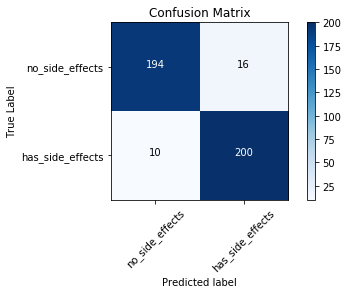

In [21]:
cm_plot_labels = ["no_side_effects", "has_side_effects"]
plot_confusion_matrix(cm, cm_plot_labels, title="Confusion Matrix")

# Saving a Keras Model

In [22]:
model.save('medical_trial_model.h5')

In [23]:
from keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [24]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [25]:
new_model.get_weights()

[array([[-0.45632112,  0.19894189, -0.48493758,  0.25453568, -0.14581095,
          0.723281  , -0.23523167,  0.71080357, -0.29159448, -0.43651834,
          0.57736117, -0.37099046, -0.3296883 ,  0.48943478, -0.11052108,
          0.24862963]], dtype=float32),
 array([ 0.        , -0.06943449,  0.        , -0.08621677,  0.18821442,
        -0.11372562,  0.        , -0.11524917,  0.        ,  0.        ,
        -0.13363537,  0.        ,  0.        ,  0.08051079,  0.        ,
        -0.08003112], dtype=float32),
 array([[ 0.02544498, -0.16662276,  0.3513603 , -0.26463988,  0.1225853 ,
          0.20221552, -0.16068798,  0.06593519, -0.09221318,  0.09665149,
          0.14174846,  0.32208416, -0.16099067,  0.00671467,  0.14761141,
          0.22611406,  0.12633449,  0.20557836, -0.26579446, -0.0834941 ,
          0.00782111,  0.3442944 ,  0.02804425,  0.01738811,  0.07616585,
          0.30933955, -0.17720903,  0.07626125,  0.1622766 ,  0.33148333,
          0.19012907, -0.02864206],
 

In [26]:
new_model.optimizer

# model.to_json()
This only saves the architecture of the model, not training or weights

In [27]:
json_string = model.to_json()
#yaml_string = model.to_yaml()

In [28]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": 

In [30]:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model.save_weights()

In [31]:
model.save_weights('my_model_weights.h5')

In [34]:
model_architecture.load_weights('my_model_weights.h5')

In [35]:
model_architecture.get_weights()

[array([[-0.45632112,  0.19894189, -0.48493758,  0.25453568, -0.14581095,
          0.723281  , -0.23523167,  0.71080357, -0.29159448, -0.43651834,
          0.57736117, -0.37099046, -0.3296883 ,  0.48943478, -0.11052108,
          0.24862963]], dtype=float32),
 array([ 0.        , -0.06943449,  0.        , -0.08621677,  0.18821442,
        -0.11372562,  0.        , -0.11524917,  0.        ,  0.        ,
        -0.13363537,  0.        ,  0.        ,  0.08051079,  0.        ,
        -0.08003112], dtype=float32),
 array([[ 0.02544498, -0.16662276,  0.3513603 , -0.26463988,  0.1225853 ,
          0.20221552, -0.16068798,  0.06593519, -0.09221318,  0.09665149,
          0.14174846,  0.32208416, -0.16099067,  0.00671467,  0.14761141,
          0.22611406,  0.12633449,  0.20557836, -0.26579446, -0.0834941 ,
          0.00782111,  0.3442944 ,  0.02804425,  0.01738811,  0.07616585,
          0.30933955, -0.17720903,  0.07626125,  0.1622766 ,  0.33148333,
          0.19012907, -0.02864206],
 